In [1]:
# Which pokemon are the strongest? What is strongest?
# Which pokemon are the most unique?
# What are the pokemon type relationships to each other?

import pandas as pd
import matplotlib.pyplot as plt
plt.style.use(style='ggplot')
plt.rcParams['figure.figsize'] = (10, 6)

import seaborn as sns

In [2]:
df = pd.read_csv('pokemon.csv')
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [6]:
df['base_happiness'].groupby(df['type1']).sum().to_csv('pokemon_happiness.csv')

In [137]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [138]:
df['generation'].value_counts(ascending=False)

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

In [139]:
new_df = df[['name', 'type1', 'type2', 'classfication', 'abilities']]

In [140]:
new_df.head()

,name,type1,type2,classfication,abilities
0,Bulbasaur,grass,poison,Seed Pokémon,"['Overgrow', 'Chlorophyll']"
1,Ivysaur,grass,poison,Seed Pokémon,"['Overgrow', 'Chlorophyll']"
2,Venusaur,grass,poison,Seed Pokémon,"['Overgrow', 'Chlorophyll']"
3,Charmander,fire,NaN,Lizard Pokémon,"['Blaze', 'Solar Power']"
4,Charmeleon,fire,NaN,Flame Pokémon,"['Blaze', 'Solar Power']"


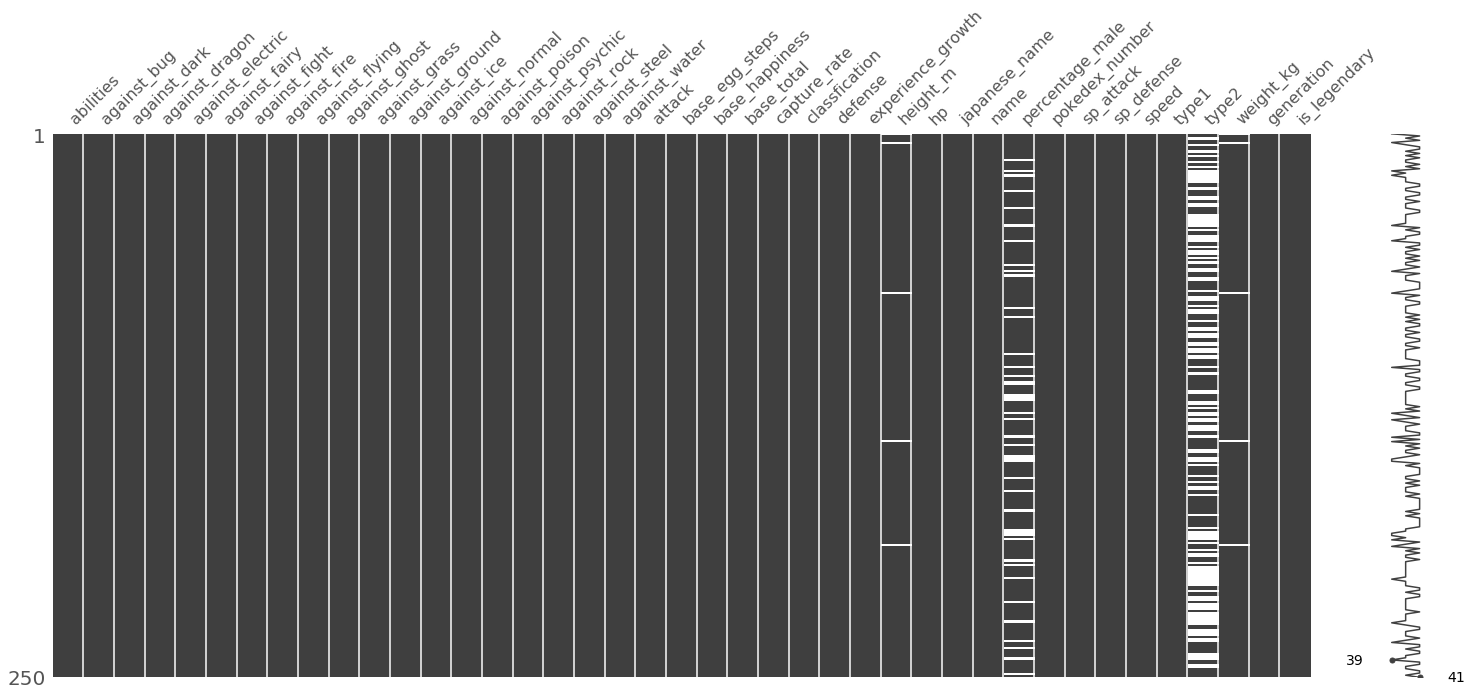

In [141]:
import missingno as msno
msno.matrix(df.sample(250))

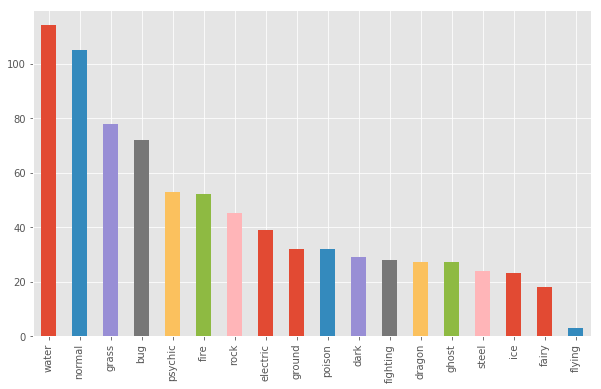

In [142]:
new_df['type1'].value_counts().plot.bar()

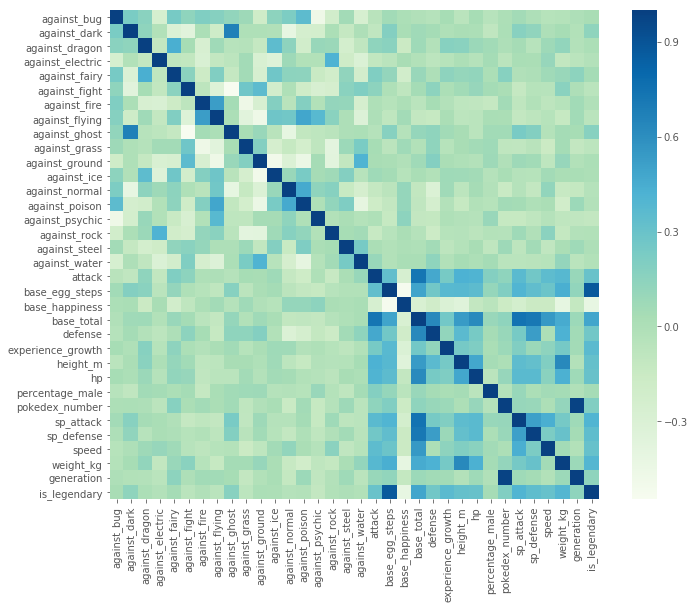

In [143]:
corr_matrix = df.corr() 
f,ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, vmax = 1, square = True, cmap = "GnBu")

In [144]:
high_cor_df = df[['attack', 'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
  'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
  'japanese_name', 'name', 'percentage_male', 'pokedex_number',
  'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg', 'type1', 'type2',
  'generation', 'is_legendary']]

len(high_cor_df.columns)

24

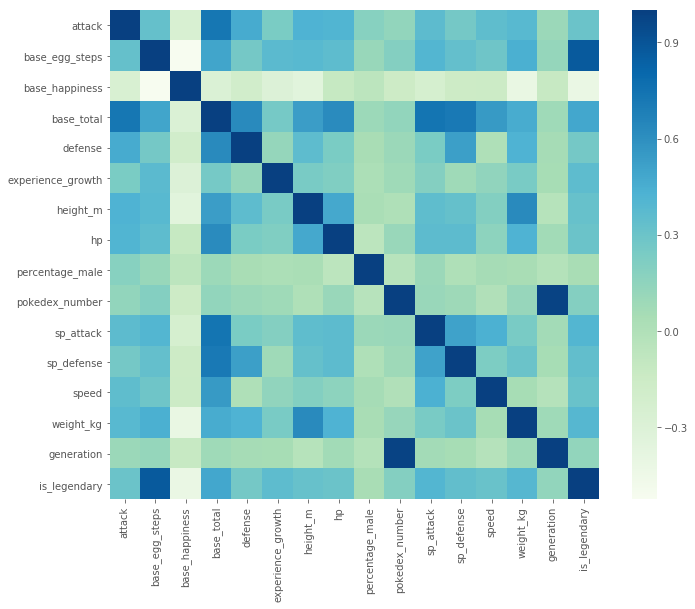

In [145]:
corr_matrix = high_cor_df.corr()
f,ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, vmax = 1, square = True, cmap = "GnBu")

In [146]:
low_cor_df = df[['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'hp', 'attack']]

len(low_cor_df.columns)

20

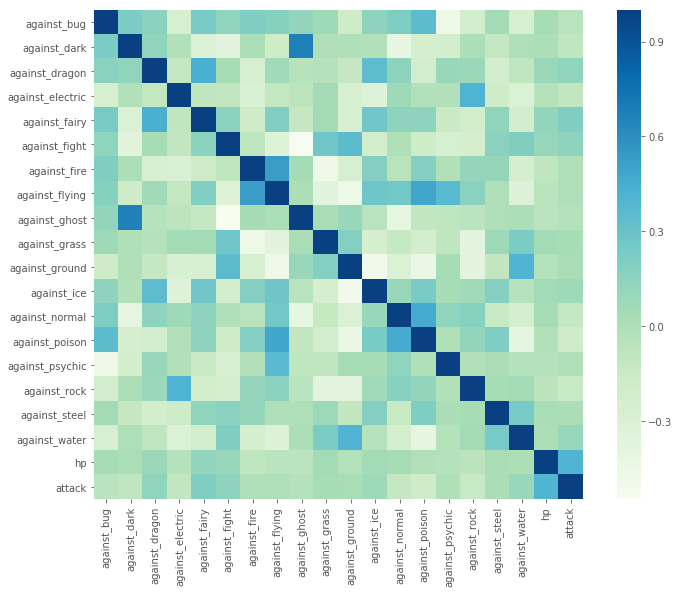

In [147]:
corr_matrix = low_cor_df.corr() 
f,ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, vmax = 1, square = True, cmap = "GnBu")

In [148]:
corr_matrix['hp'].sort_values(ascending=False)

hp                  1.000000
attack              0.410616
against_fairy       0.129284
against_fight       0.109425
against_dragon      0.089721
against_grass       0.056886
against_ice         0.055031
against_normal      0.042292
against_bug         0.034897
against_steel       0.028492
against_dark        0.010589
against_water       0.004569
against_poison     -0.020831
against_ground     -0.025928
against_electric   -0.035354
against_psychic    -0.039355
against_flying     -0.060624
against_ghost      -0.062052
against_rock       -0.069542
against_fire       -0.099242
Name: hp, dtype: float64

In [149]:
corr_matrix['attack'].sort_values(ascending=False)

attack              1.000000
hp                  0.410616
against_fairy       0.207526
against_fight       0.149123
against_dragon      0.138217
against_water       0.102973
against_ice         0.074172
against_grass       0.036787
against_ground      0.028879
against_steel       0.015767
against_flying     -0.002991
against_fire       -0.005762
against_psychic    -0.007429
against_ghost      -0.034549
against_bug        -0.054175
against_dark       -0.098849
against_electric   -0.104276
against_normal     -0.118407
against_rock       -0.131733
against_poison     -0.178035
Name: attack, dtype: float64

In [150]:
water_df = df[df['type1'] == 'water']

In [151]:
water_df = df[['name', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'hp', 'attack']]

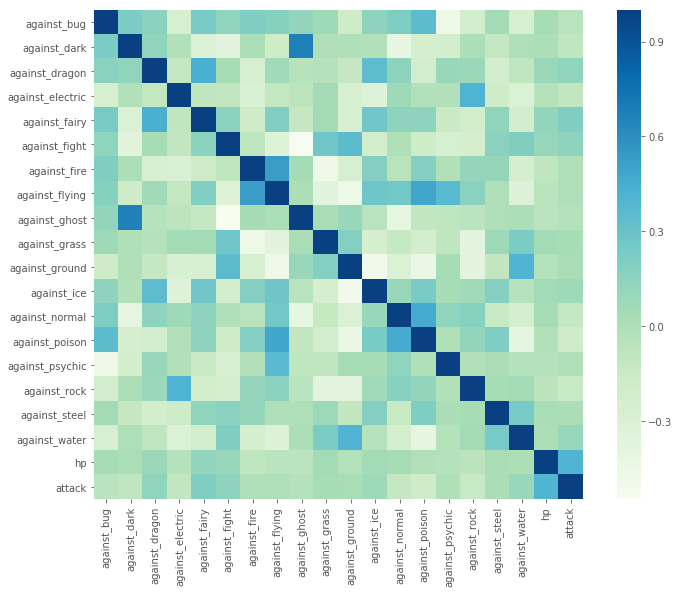

In [152]:
corr_matrix = water_df.corr() 
f,ax = plt.subplots(figsize= (12,9))
sns.heatmap(corr_matrix, vmax = 1, square = True, cmap = "GnBu")

In [153]:
df.columns

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

In [154]:
char_df = df[['name', 'weight_kg', 'speed', 'height_m', 'type1']]

In [155]:
char_df.head()

,name,weight_kg,speed,height_m,type1
0,Bulbasaur,6.9,45,0.7,grass
1,Ivysaur,13.0,60,1.0,grass
2,Venusaur,100.0,80,2.0,grass
3,Charmander,8.5,65,0.6,fire
4,Charmeleon,19.0,80,1.1,fire


In [156]:
char_df['type1'].value_counts()

water       114
normal      105
grass        78
bug          72
psychic      53
fire         52
rock         45
electric     39
ground       32
poison       32
dark         29
fighting     28
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type1, dtype: int64

In [157]:
char_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 5 columns):
name         801 non-null object
weight_kg    781 non-null float64
speed        801 non-null int64
height_m     781 non-null float64
type1        801 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 31.4+ KB


In [158]:
char_df = char_df.dropna()

In [159]:
char_df['weight_kg'] = char_df['weight_kg'].astype(int)
char_df['height_m'] = char_df['height_m'].astype(int)

In [160]:
char_df.head()

,name,weight_kg,speed,height_m,type1
0,Bulbasaur,6,45,0,grass
1,Ivysaur,13,60,1,grass
2,Venusaur,100,80,2,grass
3,Charmander,8,65,0,fire
4,Charmeleon,19,80,1,fire


In [161]:
import plotly.plotly as py
import plotly.graph_objs as go

Grass = go.Scatter(
    x = char_df[char_df['type1'] == 'grass']['speed'],
    y = char_df[char_df['type1'] == 'grass']['height_m'],
    text = char_df[char_df['type1'] == 'grass']['name'],
    mode='markers',
    marker=dict(
        color='green',
        size=(char_df[char_df['type1'] == 'grass']['weight_kg'])/12,
    )
)


Water = go.Scatter(
    x = char_df[char_df['type1'] == 'water']['speed'],
    y = char_df[char_df['type1'] == 'water']['height_m'],
    text = char_df[char_df['type1'] == 'water']['name'],
    mode='markers',
    marker=dict(
        color='blue',
        size=(char_df[char_df['type1'] == 'water']['weight_kg'])/12,
    )
)

Normal = go.Scatter(
    x = char_df[char_df['type1'] == 'normal']['speed'],
    y = char_df[char_df['type1'] == 'normal']['height_m'],
    text = char_df[char_df['type1'] == 'normal']['name'],
    mode='markers',
    marker=dict(
        color='grey',
        size=(char_df[char_df['type1'] == 'normal']['weight_kg'])/12,
    )
)

Bug = go.Scatter(
    x = char_df[char_df['type1'] == 'bug']['speed'],
    y = char_df[char_df['type1'] == 'bug']['height_m'],
    text = char_df[char_df['type1'] == 'bug']['name'],
    mode='markers',
    marker=dict(
        color='orange',
        size=(char_df[char_df['type1'] == 'bug']['weight_kg'])/12,
    )
)

Psychic = go.Scatter(
    x = char_df[char_df['type1'] == 'psychic']['speed'],
    y = char_df[char_df['type1'] == 'psychic']['height_m'],
    text = char_df[char_df['type1'] == 'psychic']['name'],
    mode='markers',
    marker=dict(
        color='purple',
        size=(char_df[char_df['type1'] == 'psychic']['weight_kg'])/12,
    )
)

Fire = go.Scatter(
    x = char_df[char_df['type1'] == 'fire']['speed'],
    y = char_df[char_df['type1'] == 'fire']['height_m'],
    text = char_df[char_df['type1'] == 'fire']['name'],
    mode='markers',
    marker=dict(
        color='red',
        size=(char_df[char_df['type1'] == 'fire']['weight_kg'])/12,
    )
)

Rock = go.Scatter(
    x = char_df[char_df['type1'] == 'rock']['speed'],
    y = char_df[char_df['type1'] == 'rock']['height_m'],
    text = char_df[char_df['type1'] == 'rock']['name'],
    mode='markers',
    marker=dict(
        color='brown',
        size=(char_df[char_df['type1'] == 'rock']['weight_kg'])/12,
    )
)

Electric = go.Scatter(
    x = char_df[char_df['type1'] == 'electric']['speed'],
    y = char_df[char_df['type1'] == 'electric']['height_m'],
    text = char_df[char_df['type1'] == 'electric']['name'],
    mode='markers',
    marker=dict(
        color='yellow',
        size=(char_df[char_df['type1'] == 'electric']['weight_kg'])/12,
    )
)

data = [Grass, Water, Bug, Normal,
       Psychic, Fire, Rock, Electric]
py.iplot(data, filename='bubblechart-color')
